In [1]:
np.random.seed(43)

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()
data = iris['data']
data[:3]
target = iris['target']
target[:3]
target_names = iris['target_names']
target_names

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2]])

array([0, 0, 0])

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [3]:
X = data
X[:3]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2]])

In [4]:
y = target
np.unique(y,return_counts=True)
y[:3]

(array([0, 1, 2]), array([50, 50, 50], dtype=int64))

array([0, 0, 0])

In [5]:
from sklearn.decomposition import PCA
pca = PCA()

In [6]:
pca.fit(X)
pca.explained_variance_ratio_

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

array([0.92461872, 0.05306648, 0.01710261, 0.00521218])

In [7]:
from sklearn.linear_model import LogisticRegression

In [8]:
lr = LogisticRegression()

In [9]:
X_train = X[:,2:4]
y_train = y

In [10]:
lr.fit(X_train,y_train)

D:\ProgramData\Anaconda3\envs\normal\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\ProgramData\Anaconda3\envs\normal\lib\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [11]:
lr.score(X_train,y_train)

0.8733333333333333

In [12]:
x_min,x_max = X_train[:,0].min()-1,X_train[:,0].max()+1
x_min,x_max
y_min,y_max = X_train[:,1].min()-1,X_train[:,1].max()+1
y_min,y_max

(0.0, 7.9)

(-0.9, 3.5)

In [13]:
data_for_im = np.meshgrid(np.arange(x_min,x_max,0.01),np.arange(y_min,y_max,0.01))
f_1,f_2 = data_for_im
f_1,f_1.shape
f_2,f_2.shape

(array([[0.  , 0.01, 0.02, ..., 7.87, 7.88, 7.89],
        [0.  , 0.01, 0.02, ..., 7.87, 7.88, 7.89],
        [0.  , 0.01, 0.02, ..., 7.87, 7.88, 7.89],
        ...,
        [0.  , 0.01, 0.02, ..., 7.87, 7.88, 7.89],
        [0.  , 0.01, 0.02, ..., 7.87, 7.88, 7.89],
        [0.  , 0.01, 0.02, ..., 7.87, 7.88, 7.89]]), (440, 790))

(array([[-0.9 , -0.9 , -0.9 , ..., -0.9 , -0.9 , -0.9 ],
        [-0.89, -0.89, -0.89, ..., -0.89, -0.89, -0.89],
        [-0.88, -0.88, -0.88, ..., -0.88, -0.88, -0.88],
        ...,
        [ 3.47,  3.47,  3.47, ...,  3.47,  3.47,  3.47],
        [ 3.48,  3.48,  3.48, ...,  3.48,  3.48,  3.48],
        [ 3.49,  3.49,  3.49, ...,  3.49,  3.49,  3.49]]), (440, 790))

In [14]:
np.c_[f_1.ravel(),f_2[::-1].ravel()][:10]

array([[0.  , 3.49],
       [0.01, 3.49],
       [0.02, 3.49],
       [0.03, 3.49],
       [0.04, 3.49],
       [0.05, 3.49],
       [0.06, 3.49],
       [0.07, 3.49],
       [0.08, 3.49],
       [0.09, 3.49]])

In [15]:
zz = lr.predict(np.c_[f_1.ravel(),f_2[::-1].ravel()])
zz = zz.reshape(f_1.shape)
zz
np.unique(zz,return_counts=True)

array([[2, 2, 2, ..., 2, 2, 2],
       [2, 2, 2, ..., 2, 2, 2],
       [2, 2, 2, ..., 2, 2, 2],
       ...,
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1]])

(array([0, 1, 2]), array([ 74474, 121568, 151558], dtype=int64))

<Figure size 1152x360 with 0 Axes>

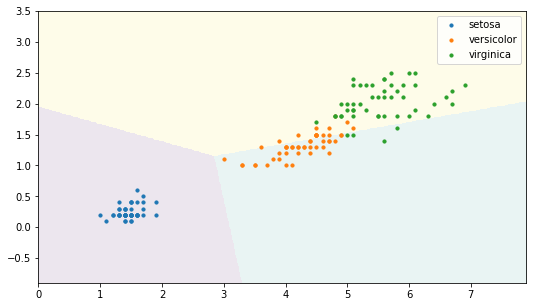

In [16]:
plt.figure(figsize=(16,5))
plt.scatter(X_train[(y_train==0).reshape(-1),0],X_train[(y_train==0).reshape(-1),1],s=10,label='setosa')
plt.scatter(X_train[(y_train==1).reshape(-1),0],X_train[(y_train==1).reshape(-1),1],s=10,label='versicolor')
plt.scatter(X_train[(y_train==2).reshape(-1),0],X_train[(y_train==2).reshape(-1),1],s=10,label='virginica')
plt.imshow(zz,alpha=0.1,extent=(x_min,x_max,y_min,y_max))
plt.legend()

<Figure size 1152x360 with 0 Axes>

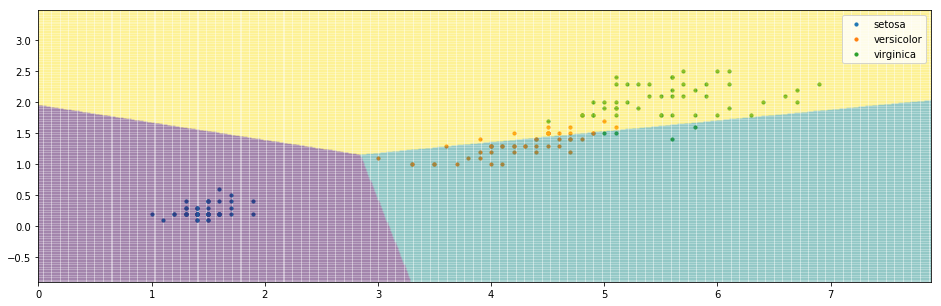

In [17]:
plt.figure(figsize=(16,5))
plt.scatter(X_train[(y_train==0).reshape(-1),0],X_train[(y_train==0).reshape(-1),1],s=10,label='setosa')
plt.scatter(X_train[(y_train==1).reshape(-1),0],X_train[(y_train==1).reshape(-1),1],s=10,label='versicolor')
plt.scatter(X_train[(y_train==2).reshape(-1),0],X_train[(y_train==2).reshape(-1),1],s=10,label='virginica')
plt.pcolormesh(f_1,f_2,(lr.predict(np.c_[f_1.ravel(),f_2.ravel()])).reshape(f_1.shape),alpha=0.1)
plt.legend()

In [18]:
y_predict = lr.predict(X_train)
y_predict
y
from sklearn.metrics import confusion_matrix
confusion_matrix(y,y_predict)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

array([[50,  0,  0],
       [ 0, 35, 15],
       [ 0,  4, 46]], dtype=int64)

In [21]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.figure(figsize=(16,5))
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],alpha=0.8, c=cmap(idx),marker=markers[idx], label=cl)
    # highlight test samples
    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:, 1], c='', alpha=1.0, linewidth=1, marker='o', s=55, label='test set')

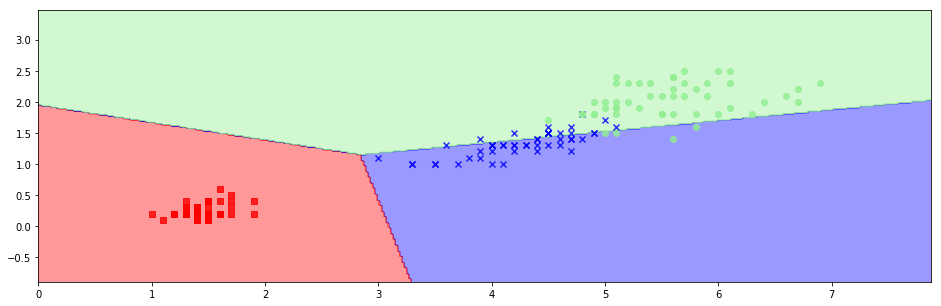

In [22]:
plot_decision_regions(X_train,y_train,lr)